In [1]:
import pandas as pd
import plotly.express as py
transaction2 = pd.read_csv('Dataset/Case Study - Transaction.csv', sep = ';')

In [2]:
maindata = pd.read_csv('Dataset\main_table.csv', sep = ',')

In [3]:
store_group = maindata.groupby(['storeid', 'storename', 'latitude', 'longitude']).agg({'customerid':'nunique', 'totalamount':'sum'}).reset_index().rename(columns={'customerid':'Total Customer', 'totalamount':'Total Amount'}).sort_values('Total Amount', ascending = True)
x = []
for i in store_group['storename']:
    i = i.strip()
    x.append(i)
store_group['storename'] = x

In [4]:
lingga_indices = store_group[store_group['storename'] == 'Lingga'].index
for i in lingga_indices:
    store_group.loc[i, 'storename'] = f"Lingga {store_group.loc[i, 'storeid']}"

SH_indices = store_group[store_group['storename'] == 'Sinar Harapan'].index
for i in SH_indices:
    store_group.loc[i, 'storename'] = f"Sinar Harapan {store_group.loc[i, 'storeid']}"

In [5]:
transaction2['Date'] = pd.to_datetime(transaction2['Date'])
transaction2['Month'] = pd.to_datetime(transaction2['Date']).dt.month
transaction2['Monthname'] = transaction2['Month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6: 'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
transactionbydate = transaction2.groupby(['Month','Monthname']).agg({'TransactionID': 'nunique','CustomerID':'nunique', 'TotalAmount':'sum', 'Qty':'sum'}).reset_index()
transactionbydate = transactionbydate.rename(columns = {'TransactionID':'Total_Transaction', 'CustomerID':'Total_Customer', 'Qty':'Total_Qty'})
transactionbydate['Total Amount (in 10000)'] = transactionbydate['TotalAmount'] / 100000

C:\Users\una\AppData\Local\Temp\ipykernel_4472\1669423568.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  transaction2['Date'] = pd.to_datetime(transaction2['Date'])


In [6]:
fig = py.line(transactionbydate, x='Monthname', y=['Total_Transaction', 'Total_Customer', 'Total Amount (in 10000)'], title='<b>Total Transaction Trend</b>', color = 'variable', markers = True,  width = 750, color_discrete_sequence=py.colors.qualitative.G10)

min_value1 = transactionbydate['Total_Transaction'].min()
max_value1 = transactionbydate['Total_Transaction'].max()

min_value2 = transactionbydate['Total_Customer'].min()
max_value2 = transactionbydate['Total_Customer'].max()

min_value3 = transactionbydate['Total Amount (in 10000)'].min()
max_value3 = transactionbydate['Total Amount (in 10000)'].max()

fig.update_layout(annotations=[
     dict(x=transactionbydate.loc[transactionbydate['Total_Transaction'] == min_value1, 'Monthname'].iloc[0],
         y=min_value1,
         xref="x", yref="y",
         text=f"Min: {min_value1}",
         ax=0, ay=20),
    dict(x=transactionbydate.loc[transactionbydate['Total_Transaction'] == max_value1, 'Monthname'].iloc[0],
         y=max_value1,
         xref="x", yref="y",
         text=f"Max: {max_value1}",
         ax=0, ay=-20),
    dict(x=transactionbydate.loc[transactionbydate['Total_Customer'] == min_value2, 'Monthname'].iloc[0],
         y=min_value2,
         xref="x", yref="y",
         text=f"Min: {min_value2}",
         ax=0, ay=20),
    dict(x=transactionbydate.loc[transactionbydate['Total_Customer'] == max_value2, 'Monthname'].iloc[0],
         y=max_value2,
         xref="x", yref="y",
         text=f"Max: {max_value2}",
         ax=0, ay=-20),
     dict(x=transactionbydate.loc[transactionbydate['Total Amount (in 10000)'] == min_value3, 'Monthname'].iloc[0],
         y=min_value3,
         xref="x", yref="y",
         text=f"Min: {min_value3}",
         ax=0, ay=20),
    dict(x=transactionbydate.loc[transactionbydate['Total Amount (in 10000)'] == max_value3, 'Monthname'].iloc[0],
         y=max_value3,
         xref="x", yref="y",
         text=f"Max: {max_value3}",
         ax=0, ay=-20)
])
fig.update_layout(legend=dict(orientation="h", yanchor="top", y=1.15, xanchor="center", x=0.5))

In [7]:
product_group = maindata.groupby('productname').agg(total_qty = ('qty', 'sum')).reset_index().rename(columns = {'total_qty':'Total Qty'})
x = []
for i in product_group['productname']:
    i = i.strip()
    x.append(i)
product_group['productname'] = x
product_chart = py.bar(product_group, x = 'Total Qty', y = 'productname', text = product_group['Total Qty'], orientation = 'h', width = 600)
product_chart.update_layout(title="<b>Total Qty from each Products</b>", title_font=dict(size=16), showlegend=False, )
product_chart.update_layout(yaxis={'categoryorder':'total ascending'})

In [8]:
pdf = pd.read_csv('pdf.csv').drop('Unnamed: 0', axis = 1)
cluster_group = pdf.groupby('CLUSTER').agg(count = ('customerid', 'nunique')).reset_index()
cluster_group['CLUSTER'] = cluster_group['CLUSTER'].astype(str)
cluster_chart = py.bar(cluster_group, x = 'CLUSTER', y = 'count', color = 'CLUSTER',text = cluster_group['count'], color_discrete_sequence=py.colors.qualitative.G10, width = 600)
cluster_chart.update_layout(title="<b>Number of Customer each Cluster</b>", title_font=dict(size=16), showlegend=False, )
cluster_chart.update_layout(yaxis={'categoryorder':'total ascending'})

In [9]:
maindata.tail(1)

,transactionid,customerid,date,productid,price,qty,totalamount,storeid,age,gender,income,maritalstatus,productname,price-2,storename,latitude,longitude
5019,TR85684 ...,55,2022-12-31,P8 ...,16000,1,16000,6,34,Male,8.44,Married ...,Oat ...,16000,Lingga ...,-5.135399,119.42379


In [10]:
total_amount = maindata.groupby('customerid').agg(total_amount = ('totalamount', 'sum'))
total_amount_clust = pdf.merge(total_amount, on = 'customerid', how = 'left')

In [11]:
cl0 = total_amount_clust[total_amount_clust['CLUSTER'] == 0]['total_amount']
cl1 = total_amount_clust[total_amount_clust['CLUSTER'] == 1]['total_amount']
cl2 = total_amount_clust[total_amount_clust['CLUSTER'] == 2]['total_amount']
cl3 = total_amount_clust[total_amount_clust['CLUSTER'] == 3]['total_amount']

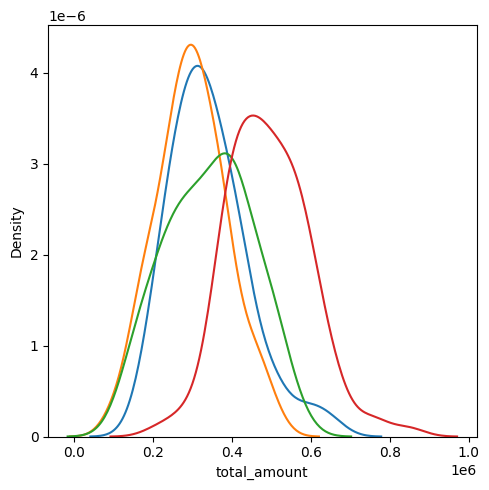

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (5, 5))
for j in [cl0, cl1, cl2, cl3]:
    sns.kdeplot(x = j)
    plt.tight_layout()

In [13]:
import random

# Ambil 97 nilai acak dari setiap cluster
samp0 = random.sample(list(cl0), 97)
samp1 = random.sample(list(cl1), 97)
samp2 = random.sample(list(cl2), 97)
samp3 = random.sample(list(cl3), 97)

# Cetak nilai-nilai acak
print("Random Values Cluster 0:", len(samp0))
print("Random Values Cluster 1:", len(samp1))
print("Random Values Cluster 2:", len(samp2))
print("Random Values Cluster 3:", len(samp3))


Random Values Cluster 0: 97
Random Values Cluster 1: 97
Random Values Cluster 2: 97
Random Values Cluster 3: 97


In [14]:
import scipy.stats as stats

# Assume samp0, samp1, samp2, samp3 are your random samples from the clusters

result = stats.f_oneway(samp0, samp1, samp2, samp3)

if result.pvalue < 0.05:
    print("There is a statistically significant difference in total amount spent among the clusters.")
else:
    print("There is no statistically significant difference in total amount spent among the clusters.")

There is a statistically significant difference in total amount spent among the clusters.


In [15]:
result.pvalue

1.867420303447071e-34

In [16]:
import numpy as np
print("Mean of Total Amount from Cluster 0:", np.mean(samp0))
print("Mean of Total Amount from Cluster 1:", np.mean(samp1))
print("Mean of Total Amount from Cluster 2:", np.mean(samp2))
print("Mean of Total Amount from Cluster 3:", np.mean(samp3))

Mean of Total Amount from Cluster 0: 338950.5154639175
Mean of Total Amount from Cluster 1: 298040.206185567
Mean of Total Amount from Cluster 2: 342047.42268041236
Mean of Total Amount from Cluster 3: 487622.6804123711


In [17]:
pd.DataFrame({'CLUSTER':[0,1,2,3], 'Mean of Total Amount': [np.mean(samp0).round(2), np.mean(samp1).round(2), np.mean(samp2).round(2), np.mean(samp3).round(2)]})

,CLUSTER,Mean of Total Amount
0,0,338950.52
1,1,298040.21
2,2,342047.42
3,3,487622.68


In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = total_amount_clust['total_amount'], groups = total_amount_clust['CLUSTER'], alpha=0.05)
print(tukey)


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
     0      1 -42897.8713 0.0081 -77488.9073  -8306.8353   True
     0      2   1379.2811 0.9996 -34448.9057  37207.4679  False
     0      3 150447.8961    0.0 115447.7245 185448.0678   True
     1      2  44277.1524 0.0087   8300.1825  80254.1223   True
     1      3 193345.7675    0.0  158193.308  228498.227   True
     2      3 149068.6151    0.0 112698.0967 185439.1334   True
---------------------------------------------------------------


In [24]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_age = pairwise_tukeyhsd(endog = total_amount_clust['income'], groups = total_amount_clust['CLUSTER'], alpha=0.05)
print(tukey_age)


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   -7.789    0.0 -9.8494 -5.7287   True
     0      2   -3.885    0.0  -6.019  -1.751   True
     0      3  -5.8805    0.0 -7.9652 -3.7958   True
     1      2   3.9041    0.0  1.7611   6.047   True
     1      3   1.9086 0.0884 -0.1852  4.0024  False
     2      3  -1.9955 0.0833 -4.1618  0.1709  False
----------------------------------------------------


In [21]:
# transaction2 = pd.read_csv('Dataset/Case Study - Transaction.csv', sep = ';')
# transaction2['Date'] = pd.to_datetime(transaction2['Date'])
# transactionbydate = transaction2.groupby('Date').agg({'TransactionID': 'nunique','CustomerID':'nunique', 'TotalAmount':'sum', 'Qty':'sum'}).reset_index()
# transactionbydate = transactionbydate.rename(columns = {'TransactionID':'Total_Transaction', 'CustomerID':'Total_Customer', 'Qty':'Total_Qty'})
# transaction2['Date'] = pd.to_datetime(transaction2['Date'])
# transaction2['Month'] = pd.to_datetime(transaction2['Date']).dt.month
# transaction2['Monthname'] = transaction2['Month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6: 'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
# transactionbydate.to_csv('transactionbydate.csv')
# transaction2.to_csv('transaction2.csv')

In [22]:
# transaction2 = pd.read_csv('Dataset/transaction2.csv')
# transactionbydate = transaction2.groupby(['Month','Monthname']).agg({'TransactionID': 'nunique','CustomerID':'nunique', 'TotalAmount':'sum', 'Qty':'sum'}).reset_index()
# transactionbydate = transactionbydate.rename(columns = {'TransactionID':'Total_Transaction', 'CustomerID':'Total_Customer', 'Qty':'Total_Qty'})
# transactionbydate['Total Amount (in 10000)'] = transactionbydate['TotalAmount'] / 100000